# Lab 1 Analysis Example using Thicket

In [1]:
!pip install llnl-thicket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.3 MB/s eta 0:00:00


In [2]:
import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Mounted at /content/drive
/content/drive/My Drive/thicket-practice


Read in all the files

In [5]:
# tk = th.Thicket.from_caliperreader(glob("cali_files/sort0/*.cali"))
tk = th.Thicket.from_caliperreader(glob("merge_cuda_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [ ]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              27870472         9.851475   
                                                  47336685         0.771172   
                                                  47349995        33.607990   
                                                  48844705        35.151441   
                                                  112973988        2.486051   
                                                  133440747       25.665017   
                                                  147533088       33.615235   
                                                  153181124        1.471097   
                                                  162177994        1.651498   
                                                  199746946        0.886345   
                                                  246214965       17.359519   
                                                  264455869        3.868689   
                                                  331780099       10.316530   
                                                  340786940        0.814511   
                                                  341218275       18.503863   
                                                  342176260        2.564809   
                                                  352749751        2.503674   
                                                  353694380       37.521588   
                                                  361584300        5.590988   
                                                  409130334        0.607422   
                                                  455670205        0.607166   
                                                  478380754        2.430481   
                                                  500480455        5.258444   
                                                  520770882        0.155172   
                                                  521436951        0.495869   
                                                  528520268        0.070389   
                                                  543825812        1.440629   
                                                  544925369        0.893507   
                                                  548212958        1.928146   
                                                  610086156        1.828237   
                                                  610176732        0.554140   
                                                  630029934      244.708830   
                                                  653311157        0.013567   
                                                  681821339        0.802393   
                                                  707336834        0.076999   
                                                  711667792        1.865128   
                                                  824490133        2.643489   
                                                  862429449        0.365657   
                                                  881410611        0.055659   
                                                  891846577        0.056925   
                                                  916639650        1.107286   
                                                  916864386        2.769755   
                                                  942006610       16.866352   
                                                  957597401        3.586996   
                                                  964496916        3.576238   
                                                  966775440        0.508345   
                                                  1015993060      18.311694   
                                                  1026471878     228.085844   
                                                  1071965932       7.009381   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [6]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init



In [7]:
tk.metadata

cali.caliper.version  \
profile                           
15660498             2.11.0-dev   
31740176             2.11.0-dev   
49815905             2.11.0-dev   
88861267             2.11.0-dev   
228616304            2.11.0-dev   
251413798            2.11.0-dev   
262997055            2.11.0-dev   
343559275            2.11.0-dev   
387030659            2.11.0-dev   
394569669            2.11.0-dev   
459820732            2.11.0-dev   
475403313            2.11.0-dev   
486084416            2.11.0-dev   
488438234            2.11.0-dev   
516209360            2.11.0-dev   
599137008            2.11.0-dev   
668040824            2.11.0-dev   
741255774            2.11.0-dev   
813158040            2.11.0-dev   
822511981            2.11.0-dev   
846075167            2.11.0-dev   
855855079            2.11.0-dev   
925785954            2.11.0-dev   
932243322            2.11.0-dev   
942198092            2.11.0-dev   
954091769            2.11.0-dev   
959553256            2.11.0-dev   
992866781            2.11.0-dev   
1103112137           2.11.0-dev   
1105235852           2.11.0-dev   
1136263315           2.11.0-dev   
1150597535           2.11.0-dev   
1267159632           2.11.0-dev   
1318850498           2.11.0-dev   
1350955218           2.11.0-dev   
1363858735           2.11.0-dev   
1365468590           2.11.0-dev   
1392484338           2.11.0-dev   
1443108942           2.11.0-dev   
1458497127           2.11.0-dev   
1613206406           2.11.0-dev   
1685341589           2.11.0-dev   
1808352864           2.11.0-dev   
1851200863           2.11.0-dev   
1851416930           2.11.0-dev   
1866006223           2.11.0-dev   
1906432979           2.11.0-dev   
1927156590           2.11.0-dev   
1999958648           2.11.0-dev   
2030618424           2.11.0-dev   
2107414477           2.11.0-dev   
2206330120           2.11.0-dev   
2222805979           2.11.0-dev   
2264251516           2.11.0-dev   
2269316624           2.11.0-dev   
2323174960           2.11.0-dev   
2344874010           2.11.0-dev   
2351511614           2.11.0-dev   
2411992676           2.11.0-dev   
2451529143           2.11.0-dev   
2473059945           2.11.0-dev   
2506623997           2.11.0-dev   
2531335822           2.11.0-dev   
2547714086           2.11.0-dev   
2565076202           2.11.0-dev   
2594665248           2.11.0-dev   
2595881126           2.11.0-dev   
2638076964           2.11.0-dev   
2656720712           2.11.0-dev   
2674216113           2.11.0-dev   
2827304535           2.11.0-dev   
2982018974           2.11.0-dev   
3034673229           2.11.0-dev   
3124419604           2.11.0-dev   
3161556729           2.11.0-dev   
3261566511           2.11.0-dev   
3333531571           2.11.0-dev   
3347466813           2.11.0-dev   
3445760668           2.11.0-dev   
3574507326           2.11.0-dev   
3592392395           2.11.0-dev   
3648209769           2.11.0-dev   
3666852459           2.11.0-dev   
3731737585           2.11.0-dev   
3832018768           2.11.0-dev   
3842431451           2.11.0-dev   
3942942890           2.11.0-dev   
3975276168           2.11.0-dev   
4012253341           2.11.0-dev   
4079877144           2.11.0-dev   
4153334837           2.11.0-dev   
4174516371           2.11.0-dev   
4189459328           2.11.0-dev   
4206225313           2.11.0-dev   
4215888436           2.11.0-dev   
4243205849           2.11.0-dev   
4246520559           2.11.0-dev   
4260267638           2.11.0-dev   
4267840878           2.11.0-dev   
4289213680           2.11.0-dev   

                                                 spot.metrics  \
profile                                                         
15660498    min#inclusive#sum#time.duration,max#inclusive#...   
31740176    min#inclusive#sum#time.duration,max#inclusive#...   
49815905    min#inclusive#sum#time.duration,max#inclusive#...   
88861267    min#inclusive#sum#time.duration,max#inclusive#...   
228616304   min#inclusive#sum#time.duration,max#in

In [16]:
# gb = tk.groupby("num_procs")
gb = tk.groupby("num_threads")
print(gb.keys())
allthickets = list(gb.values())
# input2 = gb[2].groupby("Algorithm")
# input4 = gb[4].groupby("Algorithm")
# input8 = gb[8].groupby("Algorithm")
# input16 = gb[16].groupby("Algorithm")
# input32 = gb[32].groupby("Algorithm")
# input64 = gb[64].groupby("Algorithm")
# input128 = gb[128].groupby("Algorithm")
# input256 = gb[256].groupby("Algorithm")
# input512 = gb[512].groupby("Algorithm")
# input1024 = gb[1024].groupby("Algorithm")

input64 = gb[64].groupby("InputType")
input128 = gb[128].groupby("InputType")
input256 = gb[256].groupby("InputType")
input512 = gb[512].groupby("InputType")
input1024 = gb[1024].groupby("InputType")

5  thickets created...
{64: <thicket.thicket.Thicket object at 0x7a5c3557d930>, 128: <thicket.thicket.Thicket object at 0x7a5c35508e50>, 256: <thicket.thicket.Thicket object at 0x7a5c356e52d0>, 512: <thicket.thicket.Thicket object at 0x7a5c35520f10>, 1024: <thicket.thicket.Thicket object at 0x7a5c3557ef50>}
dict_keys([64, 128, 256, 512, 1024])
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7a5c356a24a0>, 'Random': <thicket.thicket.Thicket object at 0x7a5c35676d40>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7a5c35676a40>, 'Sorted': <thicket.thicket.Thicket object at 0x7a5c356c6d40>}
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7a5c3581d240>, 'Random': <thicket.thicket.Thicket object at 0x7a5c3581cc40>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7a5c35656dd0>, 'Sorted': <thicket.thicket.Thicket object at 0x7a5c35655270>}
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7a5c356c66

Compose these 3 groups column-wise to get a holistic view of the data

In [18]:
# ctk2 = th.Thicket.concat_thickets(
#     thickets=list(input2.values()),
#     headers=list(input2.keys()),
#     axis="columns",
#     metadata_key="InputSize"
# )

# ctk4 = th.Thicket.concat_thickets(
#     thickets=list(input4.values()),
#     headers=list(input4.keys()),
#     axis="columns",
#     metadata_key="InputSize"
# )

# ctk8 = th.Thicket.concat_thickets(
#     thickets=list(input8.values()),
#     headers=list(input8.keys()),
#     axis="columns",
#     metadata_key="InputSize"
# )

# ctk16 = th.Thicket.concat_thickets(
#     thickets=list(input16.values()),
#     headers=list(input16.keys()),
#     axis="columns",
#     metadata_key="InputSize"
# )
# ctk32 = th.Thicket.concat_thickets(
#     thickets=list(input32.values()),
#     headers=list(input32.keys()),
#     axis="columns",
#     metadata_key="InputSize"
# )
ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
# allctk.append(ctk2)
# allctk.append(ctk4)
# allctk.append(ctk8)
# allctk.append(ctk16)
# allctk.append(ctk32)
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [19]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359440   
                                                  4096           0.358508   
                                                  8192           0.342552   
                                                  16384          0.370204   
                                                  32768          0.655318   
{'name': 'comm', 'type': 'function'}              2048           0.000151   
                                                  4096           0.000151   
                                                  8192           0.000168   
                                                  16384          0.000176   
                                                  32768          0.000208   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096           0.000084   
                                                  8192           0.000099   
                                                  16384          0.000114   
                                                  32768          0.000143   
{'name': 'comp', 'type': 'function'}              2048           0.000298   
                                                  4096           0.000319   
                                                  8192           0.000342   
                                                  16384          0.000360   
                                                  32768          0.000382   
{'name': 'comp_large', 'type': 'function'}        2048           0.000190   
                                                  4096           0.000195   
                                                  8192           0.000215   
                                                  16384          0.000223   
                                                  32768          0.000236   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000363   
                                                  4096           0.000297   
                                                  8192           0.000323   
                                                  16384          0.000355   
                                                  32768          0.000395   
{'name': 'data_init', 'type': 'function'}         2048           0.000063   
                                                  4096           0.000109   
                                                  8192           0.000214   
                                                  16384          0.000394   
                                                  32768          0.000976   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.359440   
                                                  4096           0.358508   
                                                  8192           0.342552   
                                                  16384          0.370204   
                                                  32768          0.655318   
{'name': 'comm', 'type': 'function'}              2048           0.000151   
                                                  4096           0.000151   
                                                  8192           0.000168   
                                                  16384          0.000176   
                                                  32768          0.000208   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.356645   
                                                  4096           0.372276   
                                                  8192           0.375784   
                                                  16384          0.361545   
                                                  32768          0.642979   
{'name': 'comm', 'type': 'function'}              2048           0.000154   
                                                  4096           0.000160   
                                                  8192           0.000171   
                                                  16384          0.000178   
                                                  32768          0.000225   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096           0.000091   
                                                  8192           0.000101   
                                                  16384          0.000115   
                                                  32768          0.000151   
{'name': 'comp', 'type': 'function'}              2048           0.000304   
                                                  4096           0.000325   
                                                  8192           0.000346   
                                                  16384          0.000354   
                                                  32768          0.000390   
{'name': 'comp_large', 'type': 'function'}        2048           0.000193   
                                                  4096           0.000207   
                                                  8192           0.000218   
                                                  16384          0.000220   
                                                  32768          0.000247   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000316   
                                                  4096           0.000292   
                                                  8192           0.000295   
                                                  16384          0.000363   
                                                  32768          0.000383   
{'name': 'data_init', 'type': 'function'}         2048           0.000064   
                                                  4096           0.000109   
                                                  8192           0.000208   
                                                  16384          0.000398   
                                                  32768          0.000828   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.356645   
                                                  4096           0.372276   
                                                  8192           0.375784   
                                                  16384          0.361545   
                                                  32768          0.642979   
{'name': 'comm', 'type': 'function'}              2048           0.000154   
                                                  4096           0.000160   
                                                  8192           0.000171   
                                                  16384          0.000178   
                                                  32768          0.000225   
{'name': 'comm_large', 'type': 'function'}        2048           0.000083   
                                                  4096   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.353209   
                                                  4096           0.363604   
                                                  8192           0.373636   
                                                  16384          0.365059   
                                                  32768          0.660256   
{'name': 'comm', 'type': 'function'}              2048           0.000156   
                                                  4096           0.000174   
                                                  8192           0.000158   
                                                  16384          0.000208   
                                                  32768          0.000214   
{'name': 'comm_large', 'type': 'function'}        2048           0.000086   
                                                  4096           0.000095   
                                                  8192           0.000096   
                                                  16384          0.000132   
                                                  32768          0.000145   
{'name': 'comp', 'type': 'function'}              2048           0.000307   
                                                  4096           0.000329   
                                                  8192           0.000354   
                                                  16384          0.000453   
                                                  32768          0.000380   
{'name': 'comp_large', 'type': 'function'}        2048           0.000198   
                                                  4096           0.000210   
                                                  8192           0.000226   
                                                  16384          0.000288   
                                                  32768          0.000234   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000322   
                                                  4096           0.000321   
                                                  8192           0.000398   
                                                  16384          0.000456   
                                                  32768          0.000373   
{'name': 'data_init', 'type': 'function'}         2048           0.000064   
                                                  4096           0.000118   
                                                  8192           0.000202   
                                                  16384          0.000401   
                                                  32768          0.001699   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.353209   
                                                  4096           0.363604   
                                                  8192           0.373636   
                                                  16384          0.365059   
                                                  32768          0.660256   
{'name': 'comm', 'type': 'function'}              2048           0.000156   
                                                  4096           0.000174   
                                                  8192           0.000158   
                                                  16384          0.000208   
                                                  32768          0.000214   
{'name': 'comm_large', 'type': 'function'}        2048           0.000086   
                                                  4096   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.358263   
                                                  4096           0.353000   
                                                  8192           0.351074   
                                                  16384          0.352015   
                                                  32768          0.256301   
{'name': 'comm', 'type': 'function'}              2048           0.000147   
                                                  4096           0.000172   
                                                  8192           0.000171   
                                                  16384          0.000193   
                                                  32768          0.000224   
{'name': 'comm_large', 'type': 'function'}        2048           0.000085   
                                                  4096           0.000094   
                                                  8192           0.000105   
                                                  16384          0.000123   
                                                  32768          0.000157   
{'name': 'comp', 'type': 'function'}              2048           0.000296   
                                                  4096           0.000324   
                                                  8192           0.000406   
                                                  16384          0.000362   
                                                  32768          0.000412   
{'name': 'comp_large', 'type': 'function'}        2048           0.000188   
                                                  4096           0.000208   
                                                  8192           0.000260   
                                                  16384          0.000225   
                                                  32768          0.000257   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000368   
                                                  4096           0.000300   
                                                  8192           0.000330   
                                                  16384          0.000349   
                                                  32768          0.000345   
{'name': 'data_init', 'type': 'function'}         2048           0.000064   
                                                  4096           0.000110   
                                                  8192           0.000203   
                                                  16384          0.000401   
                                                  32768          0.000768   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.358263   
                                                  4096           0.353000   
                                                  8192           0.351074   
                                                  16384          0.352015   
                                                  32768          0.256301   
{'name': 'comm', 'type': 'function'}              2048           0.000147   
                                                  4096           0.000172   
                                                  8192           0.000171   
                                                  16384          0.000193   
                                                  32768          0.000224   
{'name': 'comm_large', 'type': 'function'}        2048           0.000085   
                                                  4096   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.355276   
                                                  4096           0.526970   
                                                  8192           0.340622   
                                                  16384          0.357137   
                                                  32768          0.359920   
{'name': 'comm', 'type': 'function'}              2048           0.000156   
                                                  4096           0.000153   
                                                  8192           0.000156   
                                                  16384          0.000199   
                                                  32768          0.000213   
{'name': 'comm_large', 'type': 'function'}        2048           0.000087   
                                                  4096           0.000093   
                                                  8192           0.000095   
                                                  16384          0.000120   
                                                  32768          0.000147   
{'name': 'comp', 'type': 'function'}              2048           0.000304   
                                                  4096           0.000382   
                                                  8192           0.000330   
                                                  16384          0.000384   
                                                  32768          0.000456   
{'name': 'comp_large', 'type': 'function'}        2048           0.000195   
                                                  4096           0.000247   
                                                  8192           0.000204   
                                                  16384          0.000241   
                                                  32768          0.000286   
{'name': 'correctness_check', 'type': 'function'} 2048           0.000264   
                                                  4096           0.000277   
                                                  8192           0.000275   
                                                  16384          0.000521   
                                                  32768          0.000415   
{'name': 'data_init', 'type': 'function'}         2048           0.000064   
                                                  4096           0.000119   
                                                  8192           0.000202   
                                                  16384          0.000404   
                                                  32768          0.000788   

                                                                           \
                                                            Max time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              2048           0.355276   
                                                  4096           0.526970   
                                                  8192           0.340622   
                                                  16384          0.357137   
                                                  32768          0.359920   
{'name': 'comm', 'type': 'function'}              2048           0.000156   
                                                  4096           0.000153   
                                                  8192           0.000156   
                                                  16384          0.000199   
                                                  32768          0.000213   
{'name': 'comm_large', 'type': 'function'}        2048           0.000087   
                                                  4096   

Perform pandas operations to get the table in a desirable format for plotting

In [20]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [21]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.359440      0.359440      0.359440   
                  4096           0.358508      0.358508      0.358508   
                  8192           0.342552      0.342552      0.342552   
                  16384          0.370204      0.370204      0.370204   
                  32768          0.655318      0.655318      0.655318   
comm              2048           0.000151      0.000151      0.000151   
                  4096           0.000151      0.000151      0.000151   
                  8192           0.000168      0.000168      0.000168   
                  16384          0.000176      0.000176      0.000176   
                  32768          0.000208      0.000208      0.000208   
comm_large        2048           0.000083      0.000083      0.000083   
                  4096           0.000084      0.000084      0.000084   
                  8192           0.000099      0.000099      0.000099   
                  16384          0.000114      0.000114      0.000114   
                  32768          0.000143      0.000143      0.000143   
comp              2048           0.000298      0.000298      0.000298   
                  4096           0.000319      0.000319      0.000319   
                  8192           0.000342      0.000342      0.000342   
                  16384          0.000360      0.000360      0.000360   
                  32768          0.000382      0.000382      0.000382   
comp_large        2048           0.000190      0.000190      0.000190   
                  4096           0.000195      0.000195      0.000195   
                  8192           0.000215      0.000215      0.000215   
                  16384          0.000223      0.000223      0.000223   
                  32768          0.000236      0.000236      0.000236   
correctness_check 2048           0.000363      0.000363      0.000363   
                  4096           0.000297      0.000297      0.000297   
                  8192           0.000323      0.000323      0.000323   
                  16384          0.000355      0.000355      0.000355   
                  32768          0.000395      0.000395      0.000395   
data_init         2048           0.000063      0.000063      0.000063   
                  4096           0.000109      0.000109      0.000109   
                  8192           0.000214      0.000214      0.000214   
                  16384          0.000394      0.000394      0.000394   
                  32768          0.000976      0.000976      0.000976   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000790          0.000790   
                  4096               0.001588          0.001588   
                  8192               0.003266          0.003266   
                  16384              0.007118          0.007118   
                  32768              0.016823          0.016823   
comm              2048               0.000005          0.000005   
                  4096               0.000007          0.000007   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comm_large        2048               0.000005          0.000005   
                  4096               0.000007          0.000007   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comp              2048               0.000785    

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.356645      0.356645      0.356645   
                  4096           0.372276      0.372276      0.372276   
                  8192           0.375784      0.375784      0.375784   
                  16384          0.361545      0.361545      0.361545   
                  32768          0.642979      0.642979      0.642979   
comm              2048           0.000154      0.000154      0.000154   
                  4096           0.000160      0.000160      0.000160   
                  8192           0.000171      0.000171      0.000171   
                  16384          0.000178      0.000178      0.000178   
                  32768          0.000225      0.000225      0.000225   
comm_large        2048           0.000083      0.000083      0.000083   
                  4096           0.000091      0.000091      0.000091   
                  8192           0.000101      0.000101      0.000101   
                  16384          0.000115      0.000115      0.000115   
                  32768          0.000151      0.000151      0.000151   
comp              2048           0.000304      0.000304      0.000304   
                  4096           0.000325      0.000325      0.000325   
                  8192           0.000346      0.000346      0.000346   
                  16384          0.000354      0.000354      0.000354   
                  32768          0.000390      0.000390      0.000390   
comp_large        2048           0.000193      0.000193      0.000193   
                  4096           0.000207      0.000207      0.000207   
                  8192           0.000218      0.000218      0.000218   
                  16384          0.000220      0.000220      0.000220   
                  32768          0.000247      0.000247      0.000247   
correctness_check 2048           0.000316      0.000316      0.000316   
                  4096           0.000292      0.000292      0.000292   
                  8192           0.000295      0.000295      0.000295   
                  16384          0.000363      0.000363      0.000363   
                  32768          0.000383      0.000383      0.000383   
data_init         2048           0.000064      0.000064      0.000064   
                  4096           0.000109      0.000109      0.000109   
                  8192           0.000208      0.000208      0.000208   
                  16384          0.000398      0.000398      0.000398   
                  32768          0.000828      0.000828      0.000828   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000839          0.000839   
                  4096               0.001804          0.001804   
                  8192               0.003487          0.003487   
                  16384              0.007274          0.007274   
                  32768              0.017040          0.017040   
comm              2048               0.000006          0.000006   
                  4096               0.000008          0.000008   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comm_large        2048               0.000006          0.000006   
                  4096               0.000008          0.000008   
                  8192               0.000010          0.000010   
                  16384              0.000016          0.000016   
                  32768              0.000028          0.000028   
comp              2048               0.000834    

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.353209      0.353209      0.353209   
                  4096           0.363604      0.363604      0.363604   
                  8192           0.373636      0.373636      0.373636   
                  16384          0.365059      0.365059      0.365059   
                  32768          0.660256      0.660256      0.660256   
comm              2048           0.000156      0.000156      0.000156   
                  4096           0.000174      0.000174      0.000174   
                  8192           0.000158      0.000158      0.000158   
                  16384          0.000208      0.000208      0.000208   
                  32768          0.000214      0.000214      0.000214   
comm_large        2048           0.000086      0.000086      0.000086   
                  4096           0.000095      0.000095      0.000095   
                  8192           0.000096      0.000096      0.000096   
                  16384          0.000132      0.000132      0.000132   
                  32768          0.000145      0.000145      0.000145   
comp              2048           0.000307      0.000307      0.000307   
                  4096           0.000329      0.000329      0.000329   
                  8192           0.000354      0.000354      0.000354   
                  16384          0.000453      0.000453      0.000453   
                  32768          0.000380      0.000380      0.000380   
comp_large        2048           0.000198      0.000198      0.000198   
                  4096           0.000210      0.000210      0.000210   
                  8192           0.000226      0.000226      0.000226   
                  16384          0.000288      0.000288      0.000288   
                  32768          0.000234      0.000234      0.000234   
correctness_check 2048           0.000322      0.000322      0.000322   
                  4096           0.000321      0.000321      0.000321   
                  8192           0.000398      0.000398      0.000398   
                  16384          0.000456      0.000456      0.000456   
                  32768          0.000373      0.000373      0.000373   
data_init         2048           0.000064      0.000064      0.000064   
                  4096           0.000118      0.000118      0.000118   
                  8192           0.000202      0.000202      0.000202   
                  16384          0.000401      0.000401      0.000401   
                  32768          0.001699      0.001699      0.001699   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000924          0.000924   
                  4096               0.002128          0.002128   
                  8192               0.003546          0.003546   
                  16384              0.006257          0.006257   
                  32768              0.017008          0.017008   
comm              2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000010          0.000010   
                  16384              0.000015          0.000015   
                  32768              0.000029          0.000029   
comm_large        2048               0.000006          0.000006   
                  4096               0.000009          0.000009   
                  8192               0.000010          0.000010   
                  16384              0.000015          0.000015   
                  32768              0.000029          0.000029   
comp              2048               0.000918    

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.358263      0.358263      0.358263   
                  4096           0.353000      0.353000      0.353000   
                  8192           0.351074      0.351074      0.351074   
                  16384          0.352015      0.352015      0.352015   
                  32768          0.256301      0.256301      0.256301   
comm              2048           0.000147      0.000147      0.000147   
                  4096           0.000172      0.000172      0.000172   
                  8192           0.000171      0.000171      0.000171   
                  16384          0.000193      0.000193      0.000193   
                  32768          0.000224      0.000224      0.000224   
comm_large        2048           0.000085      0.000085      0.000085   
                  4096           0.000094      0.000094      0.000094   
                  8192           0.000105      0.000105      0.000105   
                  16384          0.000123      0.000123      0.000123   
                  32768          0.000157      0.000157      0.000157   
comp              2048           0.000296      0.000296      0.000296   
                  4096           0.000324      0.000324      0.000324   
                  8192           0.000406      0.000406      0.000406   
                  16384          0.000362      0.000362      0.000362   
                  32768          0.000412      0.000412      0.000412   
comp_large        2048           0.000188      0.000188      0.000188   
                  4096           0.000208      0.000208      0.000208   
                  8192           0.000260      0.000260      0.000260   
                  16384          0.000225      0.000225      0.000225   
                  32768          0.000257      0.000257      0.000257   
correctness_check 2048           0.000368      0.000368      0.000368   
                  4096           0.000300      0.000300      0.000300   
                  8192           0.000330      0.000330      0.000330   
                  16384          0.000349      0.000349      0.000349   
                  32768          0.000345      0.000345      0.000345   
data_init         2048           0.000064      0.000064      0.000064   
                  4096           0.000110      0.000110      0.000110   
                  8192           0.000203      0.000203      0.000203   
                  16384          0.000401      0.000401      0.000401   
                  32768          0.000768      0.000768      0.000768   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000841          0.000841   
                  4096               0.001782          0.001782   
                  8192               0.004101          0.004101   
                  16384              0.006964          0.006964   
                  32768              0.009292          0.009292   
comm              2048               0.000006          0.000006   
                  4096               0.000007          0.000007   
                  8192               0.000011          0.000011   
                  16384              0.000016          0.000016   
                  32768              0.000025          0.000025   
comm_large        2048               0.000006          0.000006   
                  4096               0.000007          0.000007   
                  8192               0.000011          0.000011   
                  16384              0.000016          0.000016   
                  32768              0.000025          0.000025   
comp              2048               0.000835    

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              2048           0.355276      0.355276      0.355276   
                  4096           0.526970      0.526970      0.526970   
                  8192           0.340622      0.340622      0.340622   
                  16384          0.357137      0.357137      0.357137   
                  32768          0.359920      0.359920      0.359920   
comm              2048           0.000156      0.000156      0.000156   
                  4096           0.000153      0.000153      0.000153   
                  8192           0.000156      0.000156      0.000156   
                  16384          0.000199      0.000199      0.000199   
                  32768          0.000213      0.000213      0.000213   
comm_large        2048           0.000087      0.000087      0.000087   
                  4096           0.000093      0.000093      0.000093   
                  8192           0.000095      0.000095      0.000095   
                  16384          0.000120      0.000120      0.000120   
                  32768          0.000147      0.000147      0.000147   
comp              2048           0.000304      0.000304      0.000304   
                  4096           0.000382      0.000382      0.000382   
                  8192           0.000330      0.000330      0.000330   
                  16384          0.000384      0.000384      0.000384   
                  32768          0.000456      0.000456      0.000456   
comp_large        2048           0.000195      0.000195      0.000195   
                  4096           0.000247      0.000247      0.000247   
                  8192           0.000204      0.000204      0.000204   
                  16384          0.000241      0.000241      0.000241   
                  32768          0.000286      0.000286      0.000286   
correctness_check 2048           0.000264      0.000264      0.000264   
                  4096           0.000277      0.000277      0.000277   
                  8192           0.000275      0.000275      0.000275   
                  16384          0.000521      0.000521      0.000521   
                  32768          0.000415      0.000415      0.000415   
data_init         2048           0.000064      0.000064      0.000064   
                  4096           0.000119      0.000119      0.000119   
                  8192           0.000202      0.000202      0.000202   
                  16384          0.000404      0.000404      0.000404   
                  32768          0.000788      0.000788      0.000788   

                                                                 \
                            Avg GPU time/rank Min GPU time/rank   
name              InputSize                                       
main              2048               0.000880          0.000880   
                  4096               0.001156          0.001156   
                  8192               0.003217          0.003217   
                  16384              0.006201          0.006201   
                  32768              0.013563          0.013563   
comm              2048               0.000006          0.000006   
                  4096               0.000006          0.000006   
                  8192               0.000009          0.000009   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comm_large        2048               0.000006          0.000006   
                  4096               0.000006          0.000006   
                  8192               0.000009          0.000009   
                  16384              0.000015          0.000015   
                  32768              0.000027          0.000027   
comp              2048               0.000874    

In [23]:
# Drop unwanted columns
for ctk in allctk:
    # columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    columns_to_drop = [('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())



In [24]:
for ctk in allctk:
    display(ctk.metadata)

1%perturbed  \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                        \
          spot:cuda.gputime spot:node.order                spot:output   
InputSize                                                                
2048                   true            true   2048-64-2-cudamerge.cali   
4096                   true            true   4096-64-2-cudamerge.cali   
8192                   true            true   8192-64-2-cudamerge.cali   
16384                  true            true  16384-64-2-cudamerge.cali   
32768                  true            true  32768-64-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466674  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466234  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                               cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                    
2048        [./mergesort, 2048, 64, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 64, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 64, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 64, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 64, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A          64   
4096           int              4  1%perturbed       N/A          64   
8192           int              4  1%perturbed       N/A    

1%perturbed  \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                         \
          spot:cuda.gputime spot:node.order                 spot:output   
InputSize                                                                 
2048                   true            true   2048-128-2-cudamerge.cali   
4096                   true            true   4096-128-2-cudamerge.cali   
8192                   true            true   8192-128-2-cudamerge.cali   
16384                  true            true  16384-128-2-cudamerge.cali   
32768                  true            true  32768-128-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466693  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466241  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                             \
                                cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                     
2048        [./mergesort, 2048, 128, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 128, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 128, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 128, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 128, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A         128   
4096           int              4  1%perturbed       N/A         128   
8192           int              4  1%perturb

1%perturbed  \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                         \
          spot:cuda.gputime spot:node.order                 spot:output   
InputSize                                                                 
2048                   true            true   2048-256-2-cudamerge.cali   
4096                   true            true   4096-256-2-cudamerge.cali   
8192                   true            true   8192-256-2-cudamerge.cali   
16384                  true            true  16384-256-2-cudamerge.cali   
32768                  true            true  32768-256-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466715  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466254  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465093  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                             \
                                cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                     
2048        [./mergesort, 2048, 256, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 256, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 256, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 256, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 256, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A         256   
4096           int              4  1%perturbed       N/A         256   
8192           int              4  1%perturb

1%perturbed  \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                         \
          spot:cuda.gputime spot:node.order                 spot:output   
InputSize                                                                 
2048                   true            true   2048-512-2-cudamerge.cali   
4096                   true            true   4096-512-2-cudamerge.cali   
8192                   true            true   8192-512-2-cudamerge.cali   
16384                  true            true  16384-512-2-cudamerge.cali   
32768                  true            true  32768-512-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466723  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466271  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465101  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464756  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                             \
                                cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                     
2048        [./mergesort, 2048, 512, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 512, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 512, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 512, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 512, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A         512   
4096           int              4  1%perturbed       N/A         512   
8192           int              4  1%perturb

1%perturbed  \
          cali.caliper.version   
InputSize                        
2048                2.11.0-dev   
4096                2.11.0-dev   
8192                2.11.0-dev   
16384               2.11.0-dev   
32768               2.11.0-dev   

                                                              \
                                                spot.metrics   
InputSize                                                      
2048       min#inclusive#sum#time.duration,max#inclusive#...   
4096       min#inclusive#sum#time.duration,max#inclusive#...   
8192       min#inclusive#sum#time.duration,max#inclusive#...   
16384      min#inclusive#sum#time.duration,max#inclusive#...   
32768      min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
2048                                                2   
4096                                                2   
8192                                                2   
16384                                               2   
32768                                               2   

                                                                \
                      spot.options  spot.channels cali.channel   
InputSize                                                        
2048       cuda.gputime,node.order  regionprofile         spot   
4096       cuda.gputime,node.order  regionprofile         spot   
8192       cuda.gputime,node.order  regionprofile         spot   
16384      cuda.gputime,node.order  regionprofile         spot   
32768      cuda.gputime,node.order  regionprofile         spot   

                                                                          \
          spot:cuda.gputime spot:node.order                  spot:output   
InputSize                                                                  
2048                   true            true   2048-1024-2-cudamerge.cali   
4096                   true            true   4096-1024-2-cudamerge.cali   
8192                   true            true   8192-1024-2-cudamerge.cali   
16384                  true            true  16384-1024-2-cudamerge.cali   
32768                  true            true  32768-1024-2-cudamerge.cali   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
2048       1701466735  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4096       1701466274  [/scratch/group/csce435-f23/Caliper/caliper/li...   
8192       1701465114  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16384      1701464971  [/scratch/group/csce435-f23/Caliper/caliper/li...   
32768      1701464532  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                              \
                                 cmdline cluster  Algorithm ProgrammingModel   
InputSize                                                                      
2048        [./mergesort, 2048, 1024, 2]       g  MergeSort             CUDA   
4096        [./mergesort, 4096, 1024, 2]       g  MergeSort             CUDA   
8192        [./mergesort, 8192, 1024, 2]       g  MergeSort             CUDA   
16384      [./mergesort, 16384, 1024, 2]       g  MergeSort             CUDA   
32768      [./mergesort, 32768, 1024, 2]       g  MergeSort             CUDA   

                                                                      \
          Datatype SizeOfDatatype    InputType num_procs num_threads   
InputSize                                                              
2048           int              4  1%perturbed       N/A        1024   
4096           int              4  1%perturbed       N/A        1024   
8192           int          

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [25]:
# sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435356]
sizes = [2048, 4096, 8192, 16384, 32768]

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [26]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [27]:
# def plot_mpl2(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(
#         df,
#         marker='o', label=label1
#     )
#     ax.plot(df1, marker='>', label=label2)
#     ax.plot(df2, marker='<', label=label3)
#     ax.plot()
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.legend()
#     plt.grid(True)
#     #plt.yscale("log", base=10)
#     plt.xscale("log", base=2)
#     plt.xticks(sizes)
#     plt.show()
#     return fig, ax

In [47]:
def plot_mpl2(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## Main graphs

In [44]:
# temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]
temp = [('1%perturbed', 'Avg GPU time/rank'), ('Random', 'Avg GPU time/rank'), ('ReverseSorted', 'Avg GPU time/rank'), ('Sorted', 'Avg GPU time/rank')]


print(temp[0])
print(ctk.dataframe.columns)

('1%perturbed', 'Avg GPU time/rank')
MultiIndex([(  '1%perturbed',     'Min time/rank'),
            (  '1%perturbed',     'Max time/rank'),
            (  '1%perturbed',     'Avg time/rank'),
            (  '1%perturbed', 'Avg GPU time/rank'),
            (  '1%perturbed', 'Min GPU time/rank'),
            (  '1%perturbed', 'Max GPU time/rank'),
            (  '1%perturbed',    'Total GPU time'),
            (       'Random',     'Min time/rank'),
            (       'Random',     'Max time/rank'),
            (       'Random',     'Avg time/rank'),
            (       'Random', 'Avg GPU time/rank'),
            (       'Random', 'Min GPU time/rank'),
            (       'Random', 'Max GPU time/rank'),
            (       'Random',    'Total GPU time'),
            ('ReverseSorted',     'Min time/rank'),
            ('ReverseSorted',     'Max time/rank'),
            ('ReverseSorted',     'Avg time/rank'),
            ('ReverseSorted', 'Avg GPU time/rank'),
            ('ReverseSorted

In [45]:
threads =  [64, 128, 256, 512, 1024]

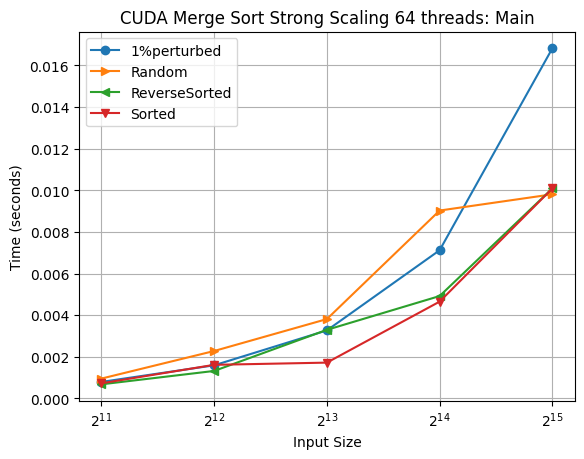

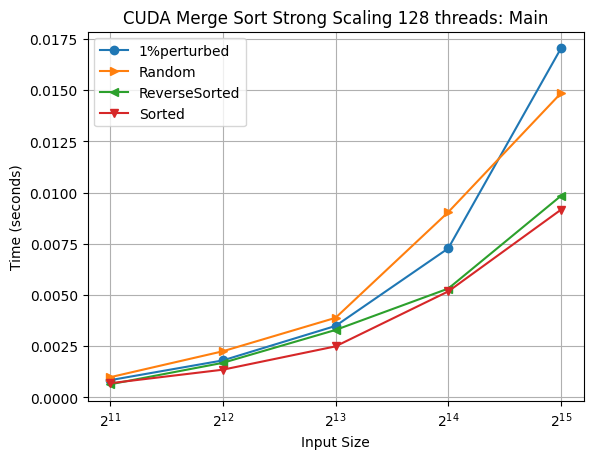

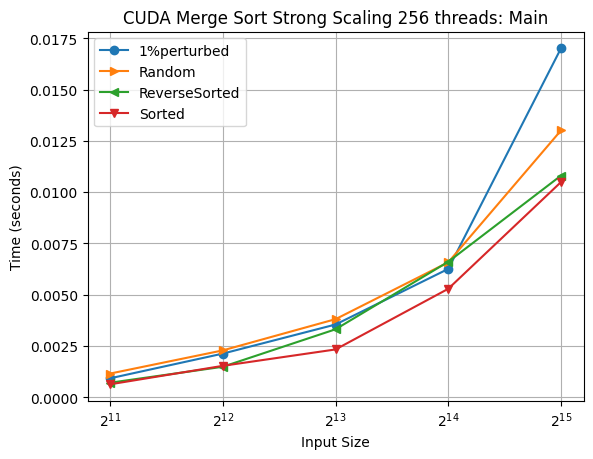

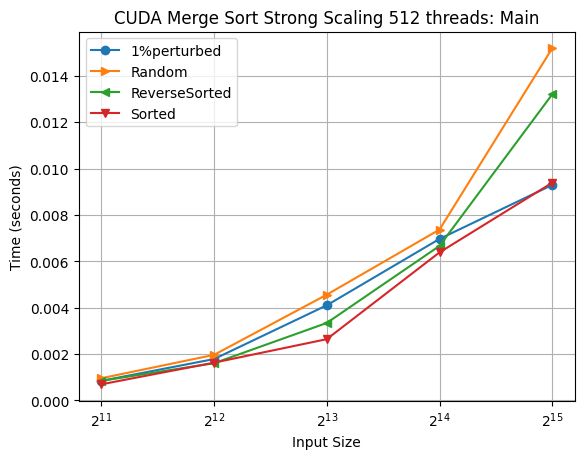

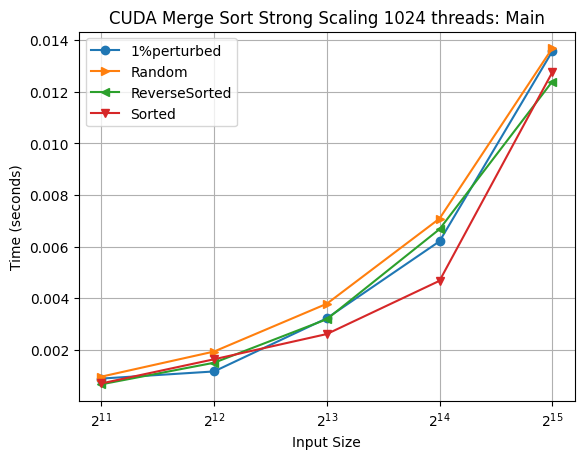

In [48]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        df3= ctk.dataframe[[temp[3]]].loc["main"],
        title=f"CUDA Merge Sort Strong Scaling {threads[i]} threads: Main",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## comp_large Graphs

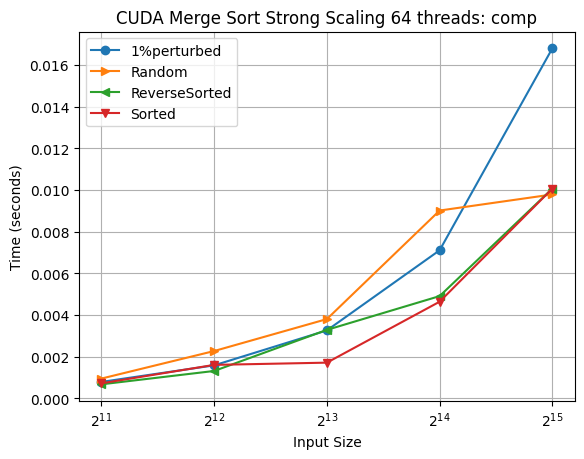

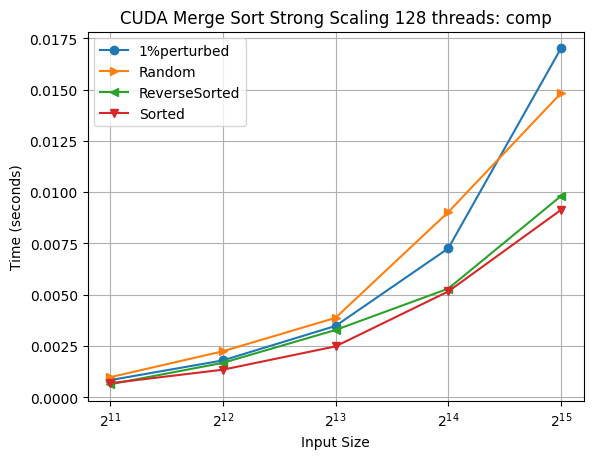

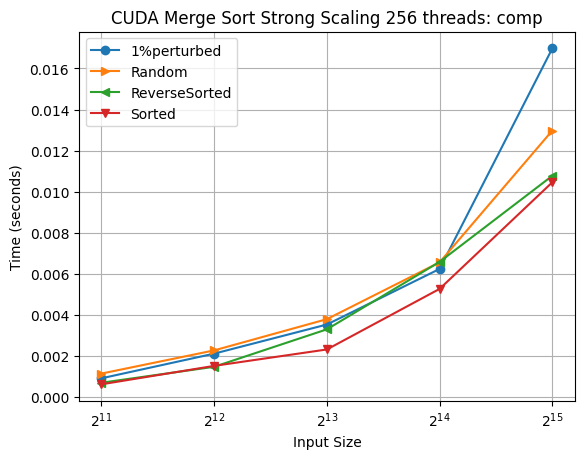

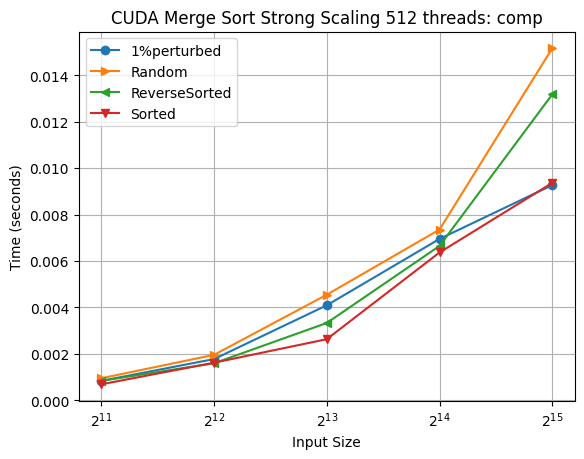

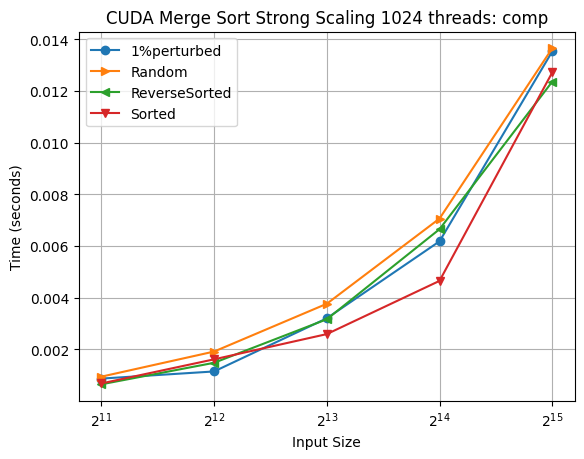

In [49]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comp"],
        df1= ctk.dataframe[[temp[1]]].loc["comp"],
        df2= ctk.dataframe[[temp[2]]].loc["comp"],
        df3= ctk.dataframe[[temp[3]]].loc["comp"],
        title=f"CUDA Merge Sort Strong Scaling {threads[i]} threads: comp",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## Comm Graphs

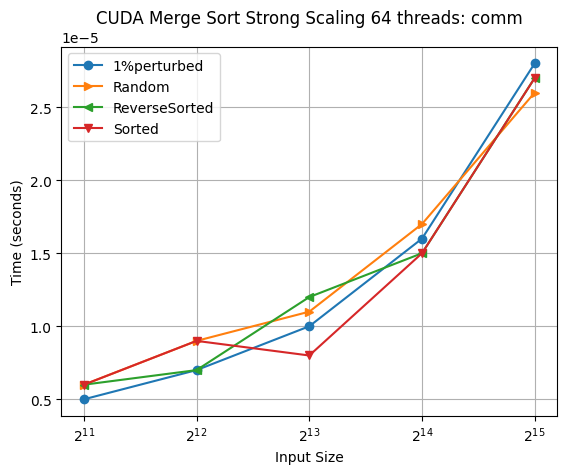

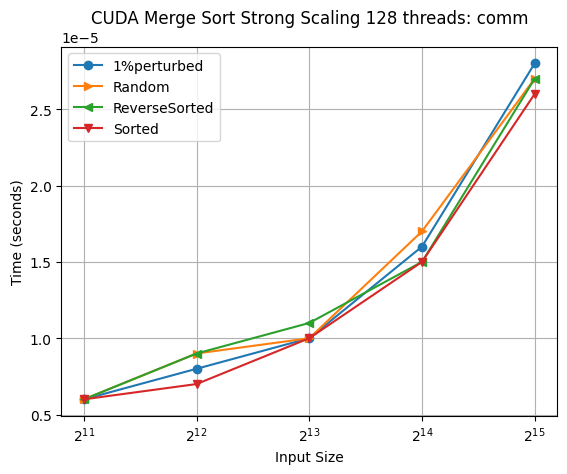

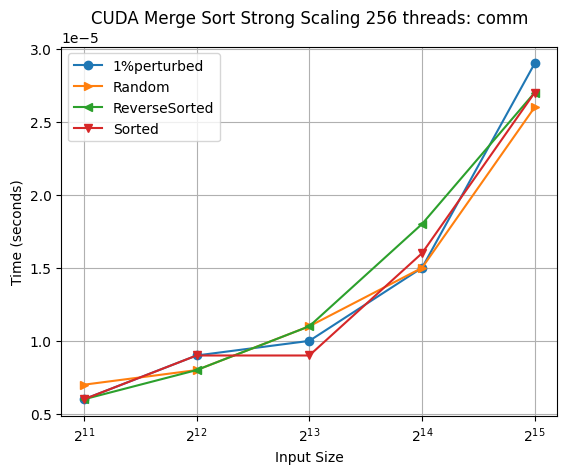

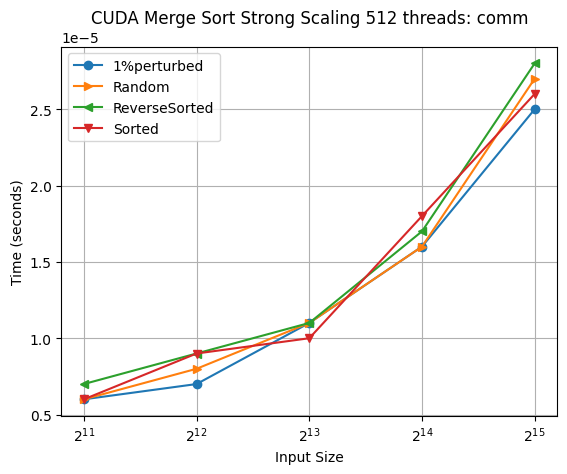

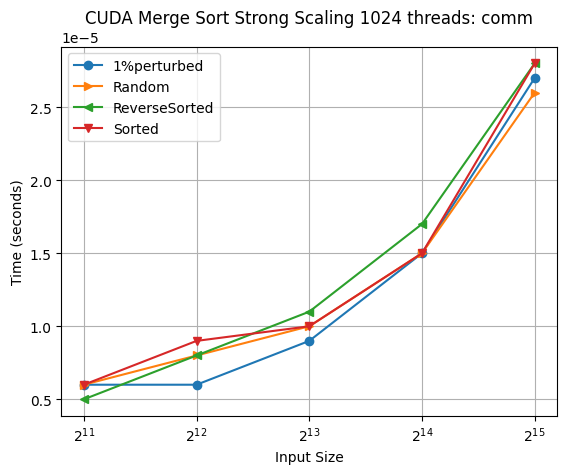

In [50]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comm"],
        df1= ctk.dataframe[[temp[1]]].loc["comm"],
        df2= ctk.dataframe[[temp[2]]].loc["comm"],
        df3= ctk.dataframe[[temp[3]]].loc["comm"],
        title=f"CUDA Merge Sort Strong Scaling {threads[i]} threads: comm",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## TODO: Speedup